In [1]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
# bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
# prophet.fit(bitcoin_df)
# [출처] [Python Data Analysis 분석 8] 데이터 분석 - 파이썬 시계열분석|작성자 뭉다



Importing plotly failed. Interactive plots will not work.


In [2]:
prophet

In [7]:
import pandas as pd

sale_df21 = pd.read_csv('./영업수주_2021_1년.csv', index_col=0)

product_nm = pd.read_csv('./제품명(수정).csv')
sale_df21
product_nm=product_nm[['제품코드','제품명']]

all_sale = pd.merge(sale_df21,product_nm, on='제품코드', how='outer')
all_sale

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
0,2001102,PEMA033101400,15000,1000,15000000,2021-01-01,2021-01-04,PEMA-580FX
1,2007302,PEMA033101400,15000,1349,20235000,2021-01-18,2021-01-21,PEMA-580FX
2,2006600,PEMA033101400,15000,1552,23280000,2021-01-24,2021-01-27,PEMA-580FX
3,2002700,PEMA033101400,15000,1796,26940000,2021-02-01,2021-02-04,PEMA-580FX
4,2006900,PEMA033101400,20000,2268,45360000,2021-02-14,2021-02-17,PEMA-580FX
...,...,...,...,...,...,...,...,...
10429,2007700,TSN4012011125,10000,2717,27170000,2021-06-21,2021-06-24,PEMA-SN400
10430,2007700,TSN4012011125,10000,2717,27170000,2021-08-21,2021-08-24,PEMA-SN400
10431,2007700,TSN4012011125,10000,2717,27170000,2021-10-21,2021-10-24,PEMA-SN400
10432,2007700,TSN4012011125,10000,2717,27170000,2021-12-21,2021-12-24,PEMA-SN400


In [38]:
one_pro=all_sale[(all_sale['거래처코드']==2007700)&(all_sale['제품명']=='PEMA-SN400')]

In [39]:
one_pro

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
10428,2007700,TSN4012011125,10000,2717,27170000,2021-04-21,2021-04-24,PEMA-SN400
10429,2007700,TSN4012011125,10000,2717,27170000,2021-06-21,2021-06-24,PEMA-SN400
10430,2007700,TSN4012011125,10000,2717,27170000,2021-08-21,2021-08-24,PEMA-SN400
10431,2007700,TSN4012011125,10000,2717,27170000,2021-10-21,2021-10-24,PEMA-SN400
10432,2007700,TSN4012011125,10000,2717,27170000,2021-12-21,2021-12-24,PEMA-SN400
10433,2007700,TSN4012011125,10000,2717,27170000,2021-12-31,2022-01-03,PEMA-SN400


In [24]:
one_pro=all_sale[(all_sale['거래처코드']==2007700)&(all_sale['제품명']=='PEMA-SN400')]

In [ ]:
li = []

for i in list(all_sale['제품명'].unique()):
    k=all_sale[all_sale['제품명']==i]
    for i in list(k['수주일자'].unique()):
        if 

In [37]:
li[2].sort_values('수주일자')

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
196,2001400,PEMA043099800,10000,1003,10030000,2021-01-01,2021-01-04,CSA5000
214,2001600,PEMA013085300,10000,1005,10050000,2021-01-01,2021-01-04,CSA5000
208,2001500,PEMA013120000,10000,1004,10040000,2021-01-01,2021-01-04,CSA5000
1651,2005600,PEMA023001000,10000,1045,10450000,2021-01-02,2021-01-05,CSA5000
1565,2005400,PEMA013111300,10000,1043,10430000,2021-01-02,2021-01-05,CSA5000
...,...,...,...,...,...,...,...,...
7605,2005800,PEMA013020300,10000,2680,26800000,2021-12-31,2022-01-03,CSA5000
8289,2005900,PEMA053054200,10000,2681,26810000,2021-12-31,2022-01-03,CSA5000
8301,2006300,PEMA013024500,10000,2685,26850000,2021-12-31,2022-01-03,CSA5000
1650,2005600,PEMA023035315,8000,2678,21424000,2021-12-31,2022-01-03,CSA5000


In [ ]:
for name in list(all_sale['제품명'].unique()):
    df = all_sale[]

In [25]:
one_pro=one_pro[['수주량','수주일자']].sort_values('수주일자')

In [26]:
one_pro=one_pro.rename({'수주일자':'ds','수주량':"y"}, axis=1)

In [27]:
one_pro['ds'] = pd.to_datetime(one_pro['ds'])

In [28]:
# sale_df21=sale_df21[(sale_df21['ds'] > '2021-02-21')&(sale_df21['ds'] < '2021-04-22')]

In [29]:
one_pro

,y,ds
10428,10000,2021-04-21
10429,10000,2021-06-21
10430,10000,2021-08-21
10431,10000,2021-10-21
10432,10000,2021-12-21
10433,10000,2021-12-31


In [19]:
prophet.fit(one_pro)

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.


In [20]:
future_data = prophet.make_future_dataframe(periods=30, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)


C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
38,2022-01-18,1.705269e+05,1.705267e+05,1.705270e+05
39,2022-01-19,4.848761e+05,4.848757e+05,4.848764e+05
40,2022-01-20,4.162157e+05,4.162153e+05,4.162160e+05
41,2022-01-21,1.121130e+06,1.121129e+06,1.121131e+06
42,2022-01-22,3.220786e+05,3.220783e+05,3.220789e+05


In [21]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-01-01,4493.064600,1.500000e+04,1.500000e+04,4493.064600,4493.064600,2.671394,2.671394,2.671394,2.338479,...,11.514513,11.514513,11.514513,-11.847429,-11.847429,-11.847429,0.0,0.0,0.0,1.500000e+04
1,2021-02-20,10507.912271,2.000000e+04,2.000000e+04,10507.912271,10507.912271,2.671394,2.671394,2.671394,0.903328,...,-5.363063,-5.363063,-5.363063,3.594996,3.594996,3.594996,0.0,0.0,0.0,2.000000e+04
2,2021-02-22,10748.493028,1.500000e+04,1.500000e+04,10748.493028,10748.493028,2.671394,2.671394,2.671394,0.395544,...,-7.659235,-7.659235,-7.659235,5.383385,5.383385,5.383385,0.0,0.0,0.0,1.500000e+04
3,2021-04-13,16763.222223,2.000000e+04,2.000000e+04,16763.222223,16763.222223,2.671394,2.671394,2.671394,0.193088,...,-2.960628,-2.960628,-2.960628,0.482322,0.482322,0.482322,0.0,0.0,0.0,2.000000e+04
4,2021-04-22,17845.842912,1.500000e+04,1.500000e+04,17845.842912,17845.842912,2.671394,2.671394,2.671394,-0.159468,...,-1.055179,-1.055179,-1.055179,-1.775684,-1.775684,-1.775684,0.0,0.0,0.0,1.500000e+04
5,2021-06-13,24101.076700,2.000000e+04,2.000000e+04,24101.076700,24101.076700,2.671394,2.671394,2.671394,-0.170162,...,3.788702,3.788702,3.788702,-6.630258,-6.630258,-6.630258,0.0,0.0,0.0,2.000000e+04
6,2021-06-22,25183.683661,1.500000e+04,1.500000e+04,25183.683661,25183.683661,2.671394,2.671394,2.671394,-0.404376,...,-2.960628,-2.960628,-2.960628,-0.115142,-0.115142,-0.115142,0.0,0.0,0.0,1.500000e+04
7,2021-08-13,31438.859714,2.000000e+04,2.000000e+04,31438.859714,31438.859714,2.671394,2.671394,2.671394,-0.363845,...,11.514513,11.514513,11.514513,-14.549752,-14.549752,-14.549752,0.0,0.0,0.0,2.000000e+04
8,2021-08-22,32521.466514,1.500000e+04,1.500000e+04,32521.466514,32521.466514,2.671394,2.671394,2.671394,-0.538766,...,3.788702,3.788702,3.788702,-6.998863,-6.998863,-6.998863,0.0,0.0,0.0,1.500000e+04
9,2021-10-13,38776.664429,2.000000e+04,2.000000e+04,38776.664429,38776.664429,2.671394,2.671394,2.671394,-0.484226,...,1.734890,1.734890,1.734890,-4.890510,-4.890510,-4.890510,0.0,0.0,0.0,2.000000e+04


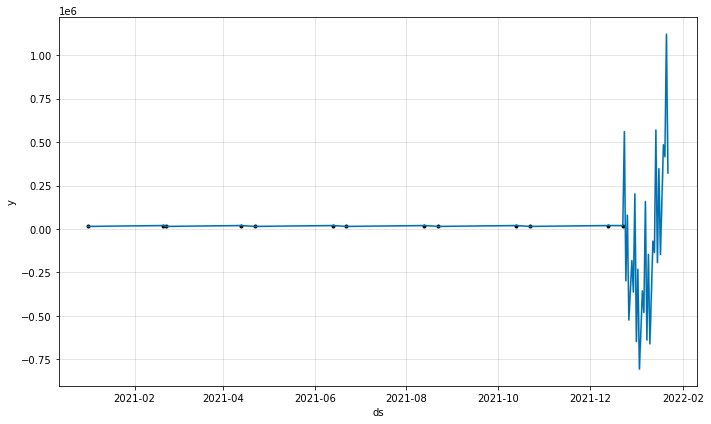

In [22]:
import matplotlib.pyplot as plt


fig1 = prophet.plot(forecast_data)


C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.ap

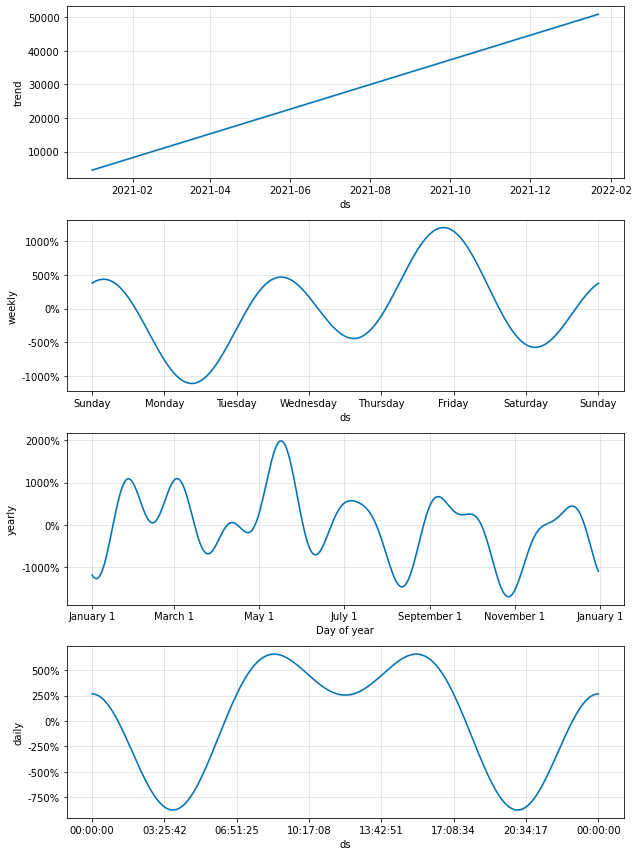

In [23]:
fig2 = prophet.plot_components(forecast_data)



3861131.0